# 3.3 Unconstrained Optimization

Here, we provide some examples of optimization problem.

Copyright:

## 1. Gradient descent for one-dimension

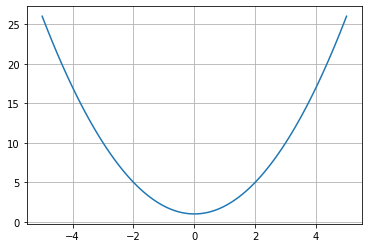

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as npl
x = np.linspace(-5,5,100)
y = x ** 2 + 1
plt.grid()
plt.plot(x,y)
plt.show()

In [2]:
def grad_1d(x):
    return x * 2

def gradient_descent_1d(grad, cur_x=0.1, learning_rate=0.01, precision=0.0001, max_iters=10000):
    """
    :param grad:           The gradient of the objective function
    :param cur_x:          The current x value, which can be provided with an initial value as an argument
    :param learning_rate:  The learning rate is also equivalent to the set step size
    :param precision:      Set the convergence precision
    :param max_iters:      maximum number of iterations
    :return:               local minimum x*
    """
    for i in range(max_iters):
        grad_cur = grad(cur_x)
        if abs(grad_cur) < precision:
            break  # When the gradient approaches 0, it is regarded as convergent
        cur_x = cur_x - grad_cur * learning_rate
        print("The", i, "iteration：x value is ", cur_x)
    print(" local minimum  x =", cur_x)
    return cur_x


if __name__ == '__main__':
    gradient_descent_1d(grad_1d, cur_x=10, learning_rate=0.2, precision=0.000001, max_iters=10000)

The 0 iteration：x value is  6.0
The 1 iteration：x value is  3.5999999999999996
The 2 iteration：x value is  2.1599999999999997
The 3 iteration：x value is  1.2959999999999998
The 4 iteration：x value is  0.7775999999999998
The 5 iteration：x value is  0.46655999999999986
The 6 iteration：x value is  0.2799359999999999
The 7 iteration：x value is  0.16796159999999993
The 8 iteration：x value is  0.10077695999999996
The 9 iteration：x value is  0.06046617599999997
The 10 iteration：x value is  0.036279705599999976
The 11 iteration：x value is  0.021767823359999987
The 12 iteration：x value is  0.013060694015999992
The 13 iteration：x value is  0.007836416409599995
The 14 iteration：x value is  0.004701849845759997
The 15 iteration：x value is  0.002821109907455998
The 16 iteration：x value is  0.0016926659444735988
The 17 iteration：x value is  0.0010155995666841593
The 18 iteration：x value is  0.0006093597400104956
The 19 iteration：x value is  0.0003656158440062973
The 20 iteration：x value is  0.000219

## 2. Gradient descent for two-dimension

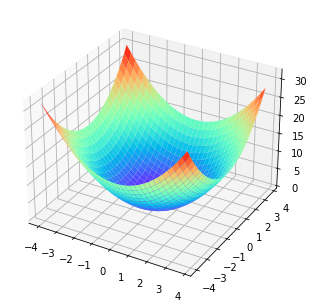

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
#Z = np.sqrt(X**2 + Y**2)
Z = X**2 + Y**2
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')

plt.show()

## 3. Stochastic gradient descent

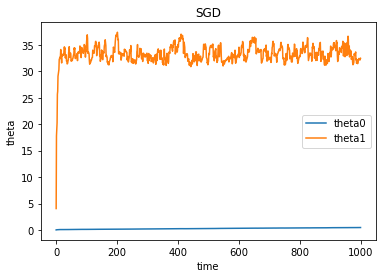

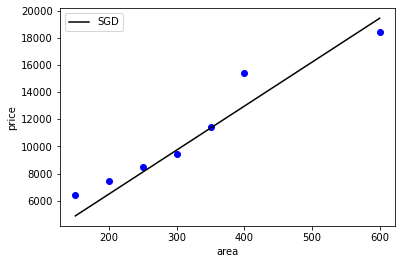

In [4]:
import matplotlib.pyplot as plt
import random

# data generation
x_train = [150,200,250,300,350,400,600]
y_train = [6450,7450,8450,9450,11450,15450,18450]
m = len(x_train)

alpha = 0.00001
cnt = 0
#Assume that the function is‘y=theta0+theta1*x'
def h(x):
    return theta0 + theta1*x

# Initialization of parameters
theta0 ,theta1 = 0,0
diff0, diff1 = 0,0
error0,error1=0,0           
retn0, retn1 = [],[]       
     
# Conditions to exit the iteration
epsilon=0.00001

# SGD
for i in range(1000):
    cnt=cnt+1
    diff0=0
    diff1=0
    j = random.randint(0, m - 1)
    diff0=h(x_train[j])-y_train[j]
    diff1=(h(x_train[j])-y_train[j])*x_train[j]
    theta0=theta0-alpha/m*diff0
    theta1=theta1-alpha/m*diff1
    retn0.append(theta0)
    retn1.append(theta1)
    error1=0
    # Calculating iteration error.
    for i in range(len(x_train)):
        error1 += ((theta0 + theta1 * x_train[i])-y_train[i]) ** 2 / 2
    # Determine whether it has converged。
    if abs(error1 - error0) < epsilon:
        break
    else:
        error0 = error1
        
# visualization  
plt.title('SGD')
plt.plot(range(len(retn0)),retn0,label='theta0')
plt.plot(range(len(retn1)),retn1,label='theta1')
plt.legend()          #显示上面的label
plt.xlabel('time')
plt.ylabel('theta')
plt.show()
plt.plot(x_train,y_train,'bo')
plt.plot(x_train,[h(x) for x in x_train],color='k',label='SGD')
plt.legend()
plt.xlabel('area')
plt.ylabel('price')
plt.show()